In [1]:
#######IMPORTING LIBRARIES
import numpy as np #For numerical computation like arrays
import pandas as pd                    #Data analysis,manipulation and visualization
import seaborn as sns                  #plotting
import scipy.io                        #reading matlab files in python
from scipy import signal               #signal processing
from scipy.fftpack import fft, dct     #signal processing

from sklearn.linear_model import LinearRegression   #linear regression model fit it to our training data using the fit() method
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, train_test_split      # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt         # For plotting graphs,charts and pie charts scatter plots,histogram
import os                                    # This function gives the name of the operating system dependent module imported.
##Deep Learning
import keras                                 #used in ML,data mining,regression and clustering
import tensorflow as tf
from tensorflow.keras.layers import Dense               #dense layer to get the output
from tensorflow.keras.layers import BatchNormalization   # to do batch normalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout              
from tensorflow.keras.models import Sequential
# from tensorflow.keras import optimizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.recurrent import LSTM
from keras import losses
from keras import metrics
from keras import optimizers
from keras.layers import Flatten
import keras
import os,random
import tensorflow as tf
# from tensorflow import keras
import matplotlib.pyplot as plt
import random
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.utils.multiclass import unique_label
import random, sys
import tensorflow as tf
from keras import layers, models, optimizers 
from tensorflow.keras.layers import Input, Add, subtract, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from scipy.io import loadmat
import _pickle as cPickle
from sklearn import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input 
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization,add
from keras.regularizers import *
import os,random
# from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.utils.multiclass import unique_label
import random, sys
from keras import layers, models, optimizers 
from tensorflow.keras.layers import Input, Add, subtract, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from scipy.io import loadmat
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
dataset=pd.read_csv('/home/shaileshmohine/Desktop/tf_pi/AFib/labelled_data_cpsc_30s_[test].csv')

In [3]:
dataset.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,output
0,1303,0.485125,0.585791,0.603784,0.582801,0.503190,0.477922,0.519705,0.588865,0.618414,...,0.288651,0.274962,0.259929,0.247162,0.237671,0.230257,0.225060,0.222920,0.220969,1.0
1,720,0.443001,0.442623,0.446729,0.453629,0.460454,0.466681,0.474100,0.483355,0.492805,...,0.476891,0.473856,0.465960,0.457223,0.452274,0.452261,0.454531,0.457381,0.463163,0.0
2,1302,0.240087,0.253079,0.268115,0.282579,0.293502,0.303516,0.311543,0.319293,0.327187,...,0.349786,0.345802,0.335345,0.325285,0.310430,0.292129,0.270363,0.254327,0.230905,1.0
3,1492,0.320397,0.323423,0.325219,0.325137,0.324579,0.324167,0.324172,0.320344,0.317444,...,0.266402,0.268775,0.270702,0.271503,0.273049,0.273866,0.274842,0.276137,0.279662,1.0
4,95,0.314999,0.313979,0.302004,0.312486,0.329603,0.334313,0.315574,0.305162,0.302151,...,0.358440,0.331243,0.333826,0.355525,0.364745,0.361726,0.350726,0.359625,0.353052,0.0


In [4]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,8991,8992,8993,8994,8995,8996,8997,8998,8999,output
0,0.485125,0.585791,0.603784,0.582801,0.503190,0.477922,0.519705,0.588865,0.618414,0.607584,...,0.288651,0.274962,0.259929,0.247162,0.237671,0.230257,0.225060,0.222920,0.220969,1.0
1,0.443001,0.442623,0.446729,0.453629,0.460454,0.466681,0.474100,0.483355,0.492805,0.500250,...,0.476891,0.473856,0.465960,0.457223,0.452274,0.452261,0.454531,0.457381,0.463163,0.0
2,0.240087,0.253079,0.268115,0.282579,0.293502,0.303516,0.311543,0.319293,0.327187,0.332263,...,0.349786,0.345802,0.335345,0.325285,0.310430,0.292129,0.270363,0.254327,0.230905,1.0
3,0.320397,0.323423,0.325219,0.325137,0.324579,0.324167,0.324172,0.320344,0.317444,0.312645,...,0.266402,0.268775,0.270702,0.271503,0.273049,0.273866,0.274842,0.276137,0.279662,1.0
4,0.314999,0.313979,0.302004,0.312486,0.329603,0.334313,0.315574,0.305162,0.302151,0.309874,...,0.358440,0.331243,0.333826,0.355525,0.364745,0.361726,0.350726,0.359625,0.353052,0.0


In [5]:
testY= dataset.loc[:,'output']
df=dataset.iloc[:, 0:8999]

In [6]:
testY.value_counts()

1.0    1000
0.0     823
Name: output, dtype: int64

In [7]:
X_test_data = np.array(df).reshape(df.shape[0], df.shape[1], 1)
print(f"Shape of X_train_1 is {X_test_data.shape} and shape of Y_train is {testY.shape}")

Shape of X_train_1 is (1823, 8999, 1) and shape of Y_train is (1823,)


In [8]:
cnn_model=keras.models.load_model('/home/shaileshmohine/Desktop/tf_pi/AFib/5,6layer_af,nsr,supra,incart,cpsc[30s]_k3_relu.h5', compile=False)

In [9]:
from tensorflow.keras.optimizers import Adam
adam = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
cnn_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [10]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 8999, 8)           32        
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4500, 8)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 4500, 16)          400       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 2250, 16)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 2250, 32)          1568      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1125, 32)        

### import seaborn as sns

time_taken17.54417896270752
183/183 [==============================] - 25s 132ms/step - loss: 0.6339 - accuracy: 0.9040
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88       823
         1.0       0.85      1.00      0.92      1000

    accuracy                           0.90      1823
   macro avg       0.92      0.89      0.90      1823
weighted avg       0.92      0.90      0.90      1823

        Non AF   AF
Non AF     650  173
AF           2  998
Specificity :  0.7897934386391251
Sensitivity :  0.998


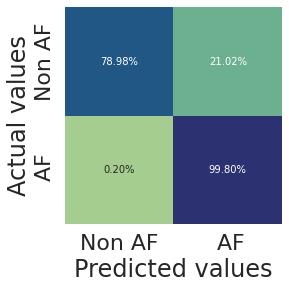

In [11]:
import time
start=time.time()
Y_pred= np.round(cnn_model.predict(X_test_data))
end=time.time()
print(f"time_taken{end-start}")

Y_pred=np.round(Y_pred)

_, accuracy = cnn_model.evaluate(X_test_data,testY,batch_size=10)
from sklearn.metrics import classification_report
print(classification_report(testY,Y_pred))
confusionmatrix=confusion_matrix(testY,Y_pred)
confusionmatrix=pd.DataFrame(confusionmatrix,columns=['Non AF',' AF'], index=['Non AF','AF'])
print(confusionmatrix)

cf=np.array(confusionmatrix)
specificity = cf[0,0]/(cf[0,0]+cf[0,1])
print('Specificity : ', specificity  )

sensitivity = cf[1,1]/(cf[1,0]+cf[1,1])
print('Sensitivity : ', sensitivity)


p=np.transpose(confusionmatrix)/(np.sum(np.transpose(confusionmatrix)))
sns.set(font_scale=2.0)
ax = sns.heatmap(np.transpose(p), annot=True, fmt='.2%', cbar=False, square=True , cmap='crest' )

#ax.set_title('Confusion Matrix in percentage with labels\n');
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non AF',' AF'])
ax.yaxis.set_ticklabels(['Non AF',' AF'])

## Display the visualization of the Confusion Matrix.
#plt.savefig('C:/Users/SARL/Desktop/database/new_dataset/5s_results/5s_5layer_cpsc_k3[test]_elu.jpg')
plt.show()